# ORIE 4580/5580/5581 Assignment 3

#### Students: M. Vasania (mv389) and I. Goyanes (ig254)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)

(**Please replace this with your own link!**)

### Instructions


* Due Thursday September 25, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [29]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

<hr><hr>

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


<hr>

**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).

<hr>

In [30]:
# Functions to visualize LCG sequence on clock (see demo notebook)

def plot_clock_face(m,fig,annotate = False):
    # Plot the m points on the unit circle
    for i in range(m):
        theta = 2.0*np.pi*i/m
        plt.plot(np.sin(theta),np.cos(theta),'rs')
        if annotate:
            plt.annotate(str(i), (np.pi/2-theta,1.05),xycoords='polar')


def plot_clock_path(m,x,fig,color = 'b'):
    # Plot the seed node
    theta_0 = 2.0*np.pi*(x[0]*(m+1)-1)/m
    plt.plot(np.sin(theta_0),np.cos(theta_0),'gs')

    # Plot the path of the LCG sequence
    for i in range(len(x)-1):
        theta_start = 2.0*np.pi*(x[i]*(m+1)-1)/m
        theta_end = 2.0*np.pi*(x[i+1]*(m+1)-1)/m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x)>0 or abs(del_y)>0:
            plt.arrow(x_start,y_start,del_x,del_y,
                      length_includes_head = True, head_width=0.05, head_length=0.1, fc=color, ec=color)


In [31]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)

def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    out = np.zeros(n)
    x = seed
    for i in range(n):
        out[i] = (x + 1.0) / (m + 1.0)
        x = (a * x + c) % m
    return out

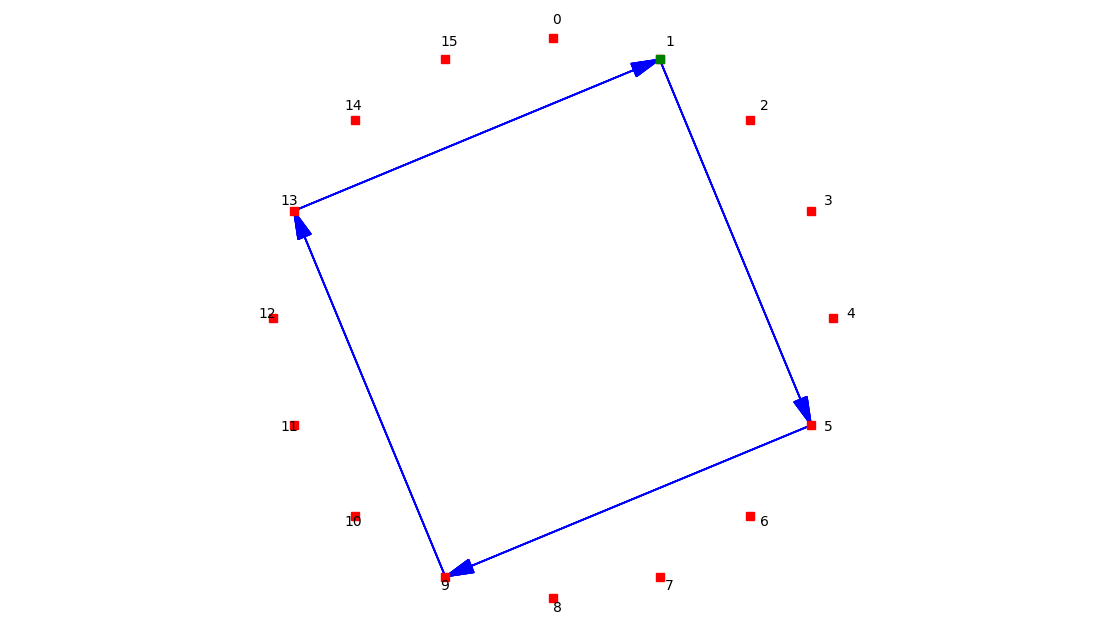

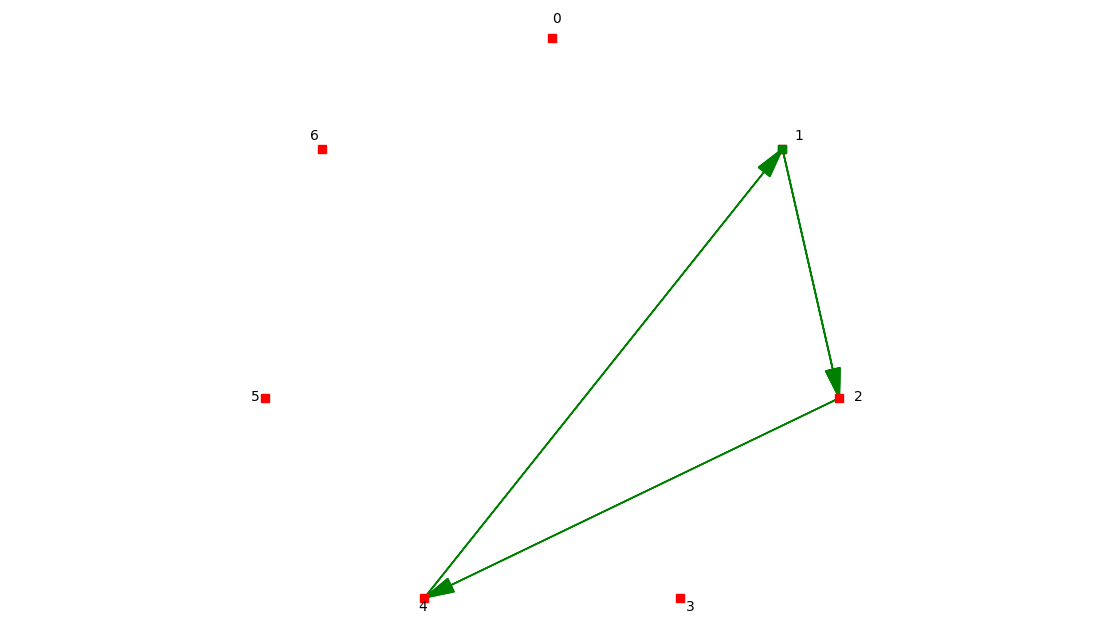

In [32]:
# Ans
# (a) x_{n+1} = 5 x_n (mod 16), y_{n+1} = 2 y_n (mod 7), seeds = 1
m1, a1, c1, seed = 16, 5, 0, 1
m2, a2, c2 = 7, 2, 0

x_u = LCG(m1+1, m=m1, a=a1, c=c1, seed=seed)
y_u = LCG(m2+1, m=m2, a=a2, c=c2, seed=seed)

# (x_n): m=16, a=5, c=0, seed=1
m, a, c, seed = 16, 5, 0, 1
fig = plt.figure(figsize=(14,8))
x = LCG(n=m+1, m=m, a=a, c=c, seed=seed)
plot_clock_face(m, fig, annotate=True)
plot_clock_path(m, x, fig, color='b')
plt.axis('equal'); plt.axis('off'); plt.show()

# (y_n): m=7, a=2, c=0, seed=1
m, a, c, seed = 7, 2, 0, 1
fig = plt.figure(figsize=(14,8))
y = LCG(n=m+1, m=m, a=a, c=c, seed=seed)
plot_clock_face(m, fig, annotate=True)
plot_clock_path(m, y, fig, color='g')
plt.axis('equal'); plt.axis('off'); plt.show()

<hr>

**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.

<hr>

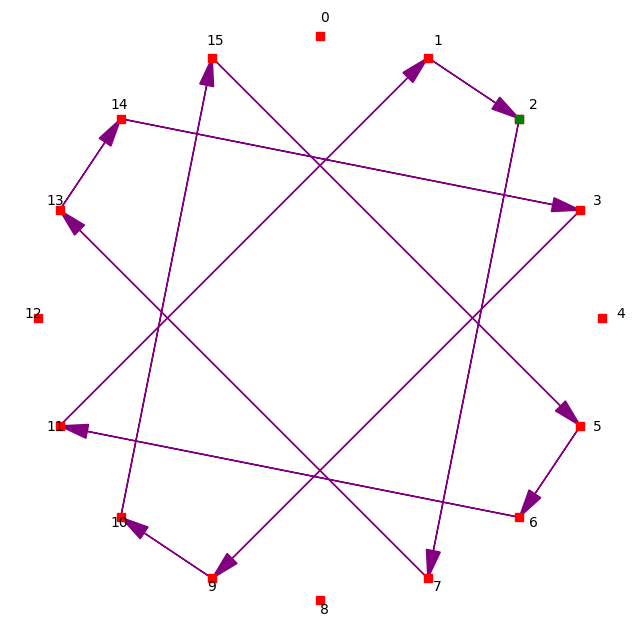

In [33]:
m1, a1, c1, seed = 16, 5, 0, 1
m2, a2, c2 = 7,  2, 0
steps = 12 + 1

x_u = LCG(n=steps, m=m1, a=a1, c=c1, seed=seed)
y_u = LCG(n=steps, m=m2, a=a2, c=c2, seed=seed)

x_states = ((x_u*(m1+1)).astype(int) - 1) % m1
y_states = ((y_u*(m2+1)).astype(int) - 1) % m2

z_states = (x_states + y_states) % m1

z_u = (z_states + 1.0)/(m1+1.0)

fig = plt.figure(figsize=(8,8))
plot_clock_face(m1, fig, annotate=True)
plot_clock_path(m1, z_u, fig, color='purple')
plt.axis('equal'); plt.axis('off'); plt.show()

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.

For $x_{n+1} \equiv 5 x_n \pmod{16}, \quad x_0 = 1$, the sequence cycles through the states \{1,5,9,13\}. Thus, $\mathrm{period}(x_n) = 4.$

Similarily, for $y_{n+1} \equiv 2 x_n \pmod{7}, \quad y_0 = 1$, the sequence cycles through the states \{1,2,4\}. Thus, $\mathrm{period}(x_n) = 3.$


Finally, for the combined generator $z_n \equiv (x_n + y_n) \bmod 16$ the period is the least common multiple of the two original periods. Thus: $
\mathrm{period}(z_n) = \mathrm{lcm}(4,3) = 12.$


Therefore:

$$
(\mathrm{Period}(x_n), \mathrm{Period}(y_n), \mathrm{Period}(z_n)) = (4,\,3,\,12).
$$

___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.

The generalized inverse is defined as

$$
F^{-1}(y) = \inf \{ x \in \mathbb{R} : F(x) \geq y \}.
$$

Working case by case:

- For $y = 0$: $F^{-1}(0) = 0$.  
- For $0 < y < \tfrac{1}{2}$: $F^{-1}(y) = y$.  
- For $y = \tfrac{1}{2}$: $F^{-1}(1/2) = \tfrac{1}{2}$.  
- For $\tfrac{1}{2} < y \leq 1$: $F^{-1}(y) = 1$.

Thus,

$$
F^{-1}(y) =
\begin{cases}
0, & y = 0, \\[6pt]
y, & 0 < y < \tfrac{1}{2}, \\[6pt]
\tfrac{1}{2}, & y = \tfrac{1}{2}, \\[6pt]
1, & \tfrac{1}{2} < y \leq 1.
\end{cases}
$$


___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

### Ans.

Derive the pseudoinverse

The CDF is

$$
F(k) = \mathbb{P}(X \leq k) = 1 - (1-p)^k, \quad k=1,2,\dots
$$

Given $U \sim \mathrm{Unif}(0,1)$, the generalized inverse is

$$
F^{-1}(U) = \inf\{k \geq 1 : 1 - (1-p)^k \geq U\}.
$$


Thus, solving for k:

$$
1 - (1-p)^k \geq U
\;\;\Longleftrightarrow\;\;
(1-p)^k \leq 1 - U
\;\;\Longleftrightarrow\;\;
k \geq \frac{\ln(1-U)}{\ln(1-p)}.
$$


Since $k$ must be an integer, the inversion algorithm is

$$
X = \left\lceil \frac{\ln(1-U)}{\ln(1-p)} \right\rceil,
\qquad U \in (0,1).
$$

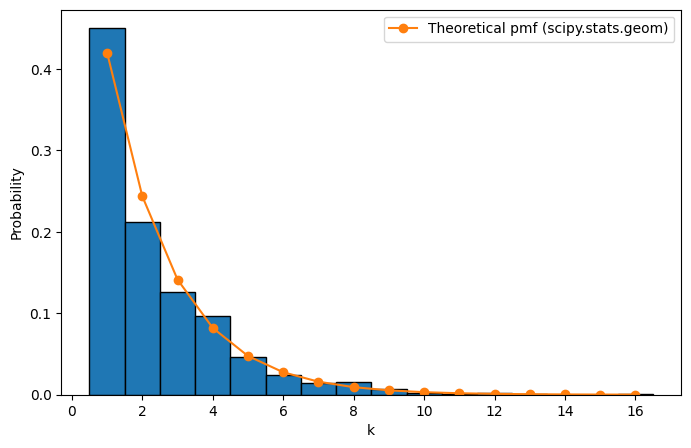

In [34]:
from scipy.stats import geom

def rgeom_inv(n, p, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    u = rng.random(n)
    k = np.ceil(np.log(1.0 - u) / np.log(1.0 - p)).astype(int)
    return k

# Generate 1000 samples from Geometric(0.42)
p = 0.42
n = 1000
samples = rgeom_inv(n, p)

max_k = max(15, samples.max())
ks = np.arange(1, max_k + 1)

plt.figure(figsize=(8,5))
plt.hist(samples, bins=np.arange(0.5, max_k + 1.5, 1), density=True, edgecolor='k')
plt.plot(ks, geom(p).pmf(ks), 'o-', label='Theoretical pmf (scipy.stats.geom)')
plt.xlabel('k')
plt.ylabel('Probability')
plt.legend()
plt.show()

___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

First compute the CDF.

For $0\le x\le 2$,
$$
F(x)=\int_0^x e^{t-2}\,dt \;=\; e^{x-2}-e^{-2}.
$$

For $x>2$,
$$
F(x)=F(2)+\int_2^x e^{-t}\,dt
\;=\; (1-e^{-2}) + (e^{-2}-e^{-x}) \;=\; 1-e^{-x}.
$$

Thus
$$
F(x)=
\begin{cases}
0, & x<0,\\[2pt]
e^{x-2}-e^{-2}, & 0\le x\le 2,\\[2pt]
1-e^{-x}, & x>2.
\end{cases}
$$

Next, the generalized inverse is
$$
F^{-1}(U) = \inf \{ x \ge 0 : F(x) \ge U \}, \qquad U\sim \mathrm{Unif}(0,1).
$$


- If $0<U\le 1-e^{-2}$: solve $F(x)=e^{x-2}-e^{-2}=U$. This gives
  $x = 2 + \ln\!\big(U+e^{-2}\big).$

- If $1-e^{-2}<U<1$: solve $F(x)=1-e^{-x}=U$. This gives
  $x = -\ln(1-U).$



Therefore the inversion sampler is
$$
X =
\begin{cases}
2+\ln\!\big(U+e^{-2}\big), & U \le 1-e^{-2}, \\[6pt]
-\ln(1-U), & U > 1-e^{-2}.
\end{cases}
$$

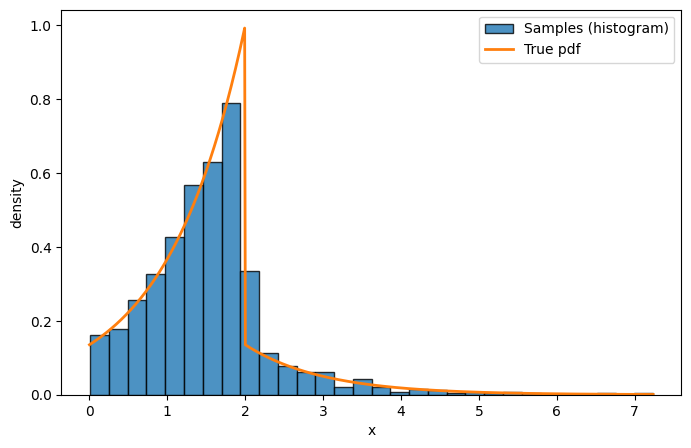

In [35]:
def sample_X(n, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    u = rng.random(n)
    u0 = 1.0 - np.exp(-2.0)
    x = np.empty(n, dtype=float)
    left = (u <= u0)
    x[left]  = 2.0 + np.log(u[left] + np.exp(-2.0))
    x[~left] = -np.log(1.0 - u[~left])
    return x

n = 1000
samples = sample_X(n)

xmax = max(6, samples.max())
xx = np.linspace(0.0, xmax, 800)
pdf = np.where(xx <= 2.0, np.exp(xx - 2.0), np.exp(-xx))

plt.figure(figsize=(8,5))
plt.hist(samples, bins=30, density=True, edgecolor='k', alpha=0.8, label='Samples (histogram)')
plt.plot(xx, pdf, lw=2, label='True pdf')
plt.xlabel('x'); plt.ylabel('density')
plt.legend()
plt.show()

<hr><hr>

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

<hr>

**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

<hr>

### Ans.

Use proposal $g(x)=\mathbf{1}_{[0,1]}(x)$ (Uniform$[0,1]$), so $g(x)=1$ on $[0,1]$.

Compute a valid envelope constant $M\ge \sup_{x\in[0,1]} \dfrac{f(x)}{g(x)}=\sup_{[0,1]} f(x)$.

Since
$$
f'(x)=\tfrac14(20x^3+12x^2+6x)=\tfrac12 x(10x^2+6x+3)>0 \quad (x>0),
$$
$f$ is increasing on $[0,1]$, hence
$$
M=f(1)=\frac{5+4+3+1}{4}=\frac{13}{4}.
$$

**Acceptance–Rejection algorithm (with $g=\mathrm{Unif}(0,1)$, $M=13/4$)**

Repeat until you have $n$ samples:
1. Draw $Y\sim \mathrm{Unif}(0,1)$ and $U\sim \mathrm{Unif}(0,1)$ independently.  
2. If $U \le \dfrac{f(Y)}{M}$, accept $X=Y$; otherwise reject and repeat.

Expected acceptance rate:
$$
\mathbb{E}[\text{accept}] = \frac{1}{M}=\frac{4}{13}\approx 0.308.
$$

In [36]:
def f(x):
    return (5*x**4 + 4*x**3 + 3*x**2 + 1)/4.0

M = 13.0/4.0

def sample_ar_X(n, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    out = np.empty(n)
    i = 0
    trials = 0
    while i < n:
        y = rng.random()
        u = rng.random()
        trials += 1
        if u <= f(y)/M:
            out[i] = y
            i += 1
    acc = i / trials
    return out, trials, acc

<hr>

**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?

<hr>

### Ans.
With  $g=\mathrm{Unif}(0,1)$ and  $M=\dfrac{13}{4}$, the acceptance
probability of each trial is
$
p_{\text{acc}}=\frac{1}{M}=\frac{4}{13}.
$

Therefore, the number of trials per accepted sample is geometric with mean
$
\mathbb{E}[\text{trials per accept}] = \frac{1}{p_{\text{acc}}}=M=\frac{13}{4}=3.25.
$

Each trial uses two $\mathrm{Unif}(0,1)$ draws (one for $Y$, one for $U$), so the
expected number of uniform draws to obtain one $X$ is
$
2M=\frac{13}{2}=6.5.
$

<hr>

**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.

<hr>

n = 2500
Empirical acceptance rate ≈ 0.313 (theory = 0.308)
Trials used = 7985  -> Uniform draws = 2 * 7985 = 15970 (> 2500)


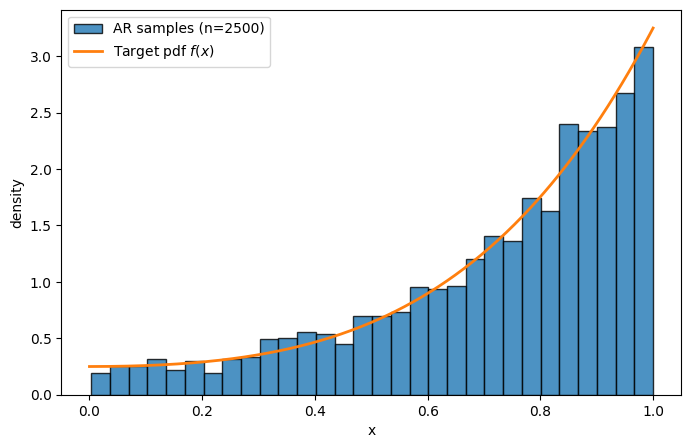

In [37]:
n = 2500
samples, trials, acc = sample_ar_X(n)

uniform_draws = 2 * trials
print(f"n = {n}")
print(f"Empirical acceptance rate ≈ {acc:.3f} (theory = {1/M:.3f})")
print(f"Trials used = {trials}  -> Uniform draws = 2 * {trials} = {uniform_draws} (> {n})")

xx = np.linspace(0, 1, 400)
plt.figure(figsize=(8,5))
plt.hist(samples, bins=30, density=True, edgecolor='k', alpha=0.8, label='AR samples (n=2500)')
plt.plot(xx, f(xx), lw=2, label='Target pdf $f(x)$')
plt.xlabel('x'); plt.ylabel('density')
plt.legend()
plt.show()

<hr><hr>

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

<hr>

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.

<hr>

For $g(x)=\tfrac12 e^{-|x|}$:
$$
G(x)=\mathbb P(X\le x)=
\begin{cases}
\tfrac12 e^{x}, & x<0,\\
1-\tfrac12 e^{-x}, & x\ge 0.
\end{cases}
$$

With $U\sim\mathrm{Unif}(0,1)$, the generalized inverse is
$
G^{-1}(U)=
\begin{cases}
\ln(2U), & U\le \tfrac12,\\[6pt]
-\ln\!\big(2(1-U)\big), & U>\tfrac12.
\end{cases}
$

In [38]:
def rlaplace_inv(n, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    u = rng.random(n)                       # in [0,1)
    # (optional numerical guard if you like)
    # u = np.clip(u, 1e-16, 1-1e-16)
    x = np.where(u <= 0.5, np.log(2.0*u), -np.log(2.0*(1.0 - u)))
    return x

<hr>

**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.

<hr>

### Ans.

$f(x)=\dfrac{e^{-x^{2}/2}}{\sqrt{2\pi}}$ (standard normal).  
$g(x)=\tfrac12 e^{-|x|}$ (Laplace$(0,1)$).

The smallest envelope constant is
$$
k^\star=\sup_{x\in\mathbb{R}}\frac{f(x)}{g(x)}
=\sup_{x\in\mathbb{R}}\frac{e^{-x^{2}/2}/\sqrt{2\pi}}{\tfrac12 e^{-|x|}}
=\frac{2}{\sqrt{2\pi}}\sup_{x\in\mathbb{R}}e^{\,|x|-x^{2}/2}.
$$
By symmetry we can maximize $|x|-x^{2}/2$ over $x\ge0$.  
Let $h(x)=x-\tfrac12x^{2}$. Then $h'(x)=1-x$, so the maximum is at $x=1$, with $h(1)=\tfrac12$.  
Thus,
$$
\,k^\star=\frac{2}{\sqrt{2\pi}}e^{1/2}=\sqrt{\frac{2}{\pi}}\,e^{1/2}\approx 1.31549\,
$$
and the acceptance probability is
$$
p_{\text{acc}}=\frac{1}{k^\star}=\sqrt{\frac{\pi}{2}}\,e^{-1/2}\approx 0.76017.
$$

Acceptance–rejection using Laplace proposal

1. Draw $Y\sim g$ (Laplace$(0,1)$) via the inversion from part (a).  
2. Draw $U\sim \mathrm{Unif}(0,1)$.  
3. Accept $X=Y$ if $U \le \dfrac{f(Y)}{k^\star g(Y)}$; otherwise reject and repeat.

Expected number of samples per accepted $X$:
- Proposal draws (Laplace): $\mathbb{E}[\text{trials per accept}] = k^\star \approx 1.3155$.  
- If counting underlying uniforms (one to make $Y$ by inversion and one for $U$ each trial): expected uniforms per $X$ is $2k^\star \approx 2.631$.

In [39]:
def f_norm(x):
    return np.exp(-0.5*x**2)/np.sqrt(2*np.pi)

def g_lap(x):
    return 0.5*np.exp(-np.abs(x))

k_star = np.sqrt(2/np.pi)*np.exp(0.5)
p_acc  = 1.0 / k_star

def rlaplace_inv(n, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    u = rng.random(n)
    return np.where(u <= 0.5, np.log(2*u), -np.log(2*(1-u)))

def rnorm_ar_laplace(n, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    out = np.empty(n)
    i = 0
    trials = 0
    while i < n:
        y = rlaplace_inv(1, rng=rng)[0]
        u = rng.random()
        trials += 1
        if u <= f_norm(y)/(k_star*g_lap(y)):
            out[i] = y
            i += 1
    acc = i/trials
    return out, trials, acc

<hr>

**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.

<hr>

n=1000
Empirical acceptance ≈ 0.7680 (theory = 0.7602)
Trials used = 1302  -> Uniform draws = 2 * 1302 = 2604


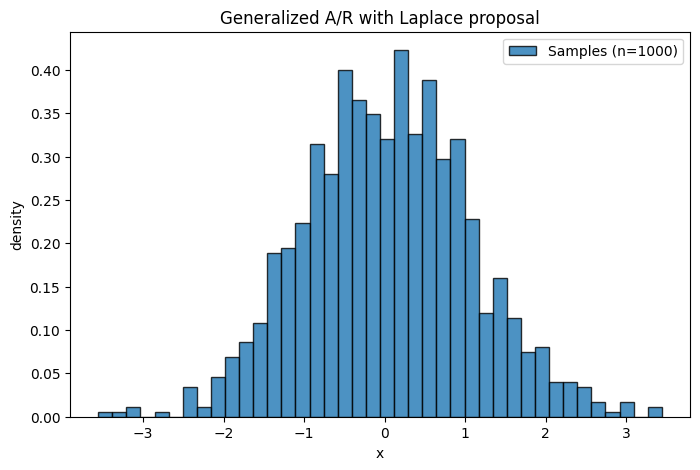


Average Uniform draws over 500 runs: 2632.4
95% CI (replication-based): [2628.6, 2636.3]


In [40]:
rng = np.random.default_rng()
n = 1000
xs, trials, acc = rnorm_ar_laplace(n, rng=rng)
uniform_draws = 2 * trials

print(f"n={n}")
print(f"Empirical acceptance ≈ {acc:.4f} (theory = {p_acc:.4f})")
print(f"Trials used = {trials}  -> Uniform draws = 2 * {trials} = {uniform_draws}")

xx = np.linspace(-4, 4, 800)
plt.figure(figsize=(8,5))
plt.hist(xs, bins=40, density=True, edgecolor='k', alpha=0.8, label='Samples (n=1000)')
plt.xlabel('x'); plt.ylabel('density'); plt.title('Generalized A/R with Laplace proposal')
plt.legend(); plt.show()

R = 500
draw_counts = np.empty(R, dtype=float)
for r in range(R):
    _, tr, _ = rnorm_ar_laplace(n, rng=np.random.default_rng())
    draw_counts[r] = 2 * tr

mean_draws = draw_counts.mean()
se_draws = draw_counts.std(ddof=1) / np.sqrt(R)
ci_lo, ci_hi = mean_draws - 1.96*se_draws, mean_draws + 1.96*se_draws

print(f"\nAverage Uniform draws over {R} runs: {mean_draws:.1f}")
print(f"95% CI (replication-based): [{ci_lo:.1f}, {ci_hi:.1f}]")

<hr>

**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.

<hr>

For the standard Cauchy proposal with pdf
$
g(x)=\frac{1}{\pi(1+x^2)},
$
the CDF is:
$$
G(x)=\frac{1}{\pi}\arctan(x)+\frac{1}{2}.
$$
Using inverse transform with $U\sim\mathrm{Unif}(0,1)$,
$$
G^{-1}(U)=\tan\!\big(\pi(U-\tfrac12)\big).
$$
So to sample: draw $U$ and set $X=\tan\!\big(\pi(U-\tfrac12)\big)$.

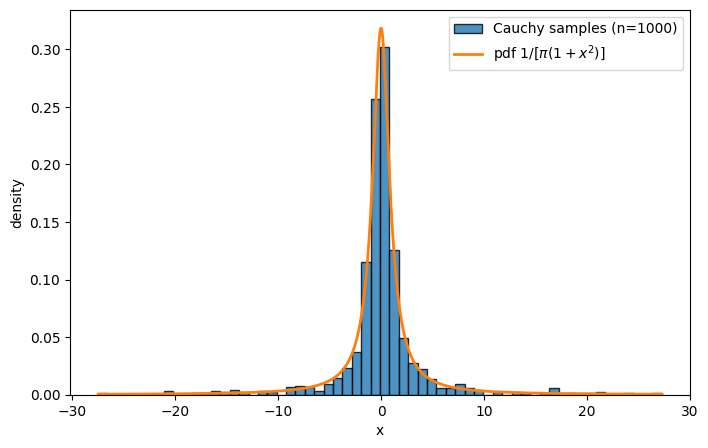

In [41]:
def rcauchy_inv(n, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    u = rng.random(n)
    return np.tan(np.pi*(u - 0.5))

n = 1000
samples = rcauchy_inv(n)

lo, hi = np.quantile(samples, [0.01, 0.99])

xx = np.linspace(lo, hi, 800)
pdf = 1.0/(np.pi*(1.0 + xx**2))

plt.figure(figsize=(8,5))
plt.hist(samples, bins=60, density=True, range=(lo, hi),
         edgecolor='k', alpha=0.8, label='Cauchy samples (n=1000)')
plt.plot(xx, pdf, lw=2, label=r'pdf $1/[\pi(1+x^2)]$')
plt.xlabel('x'); plt.ylabel('density')
plt.legend(); plt.show()


<hr>

**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.

<hr>

### Ans.

$f(x)=\dfrac{e^{-x^{2}/2}}{\sqrt{2\pi}}$.  
$g(x)=\dfrac{1}{\pi(1+x^{2})}$ (standard Cauchy).

Smallest envelope:
$$
k^\star=\sup_{x\in\mathbb{R}}\frac{f(x)}{g(x)}
=\frac{\pi}{\sqrt{2\pi}}\sup_{x\in\mathbb{R}}(1+x^2)e^{-x^2/2}.
$$

Let $h(x)=\log(1+x^2)-\tfrac12 x^2$. Then
$$
h'(x)=\frac{2x}{1+x^2}-x=0 \;\Longrightarrow\; x\in\{0,\pm1\}.
$$
$(1+0)e^{0}=1$, $(1+1)e^{-1/2}=2e^{-1/2}$ (larger), so the maximum is at $x=\pm1$. Thus,
$$
\,k^\star=\frac{\pi}{\sqrt{2\pi}}\cdot 2e^{-1/2}
      =\sqrt{2\pi}\,e^{-1/2}\approx 1.5203\,
$$

Acceptance–rejection with the Cauchy proposal:

1. Draw $Y\sim g$ via inversion $Y=\tan\!\big(\pi(U_1-\tfrac12)\big)$ with $U_1\sim\mathrm{Unif}(0,1)$.
2. Draw $U_2\sim\mathrm{Unif}(0,1)$.
3. Accept $X=Y$ if
$$
U_2 \le \frac{f(Y)}{k^\star g(Y)}
= \frac{ \dfrac{e^{-Y^2/2}}{\sqrt{2\pi}} }
       { \big(\sqrt{2\pi}e^{-1/2}\big)\dfrac{1}{\pi(1+Y^2)} }
= \frac{e^{1/2}}{2}\,(1+Y^2)\,e^{-Y^2/2}.
$$

Expected number of samples per accepted $X$:

- Acceptance probability: $p_{\text{acc}}=1/k^\star=e^{1/2}/\sqrt{2\pi}\approx 0.6577$.  
- Expected proposal trials per accepted sample: $k^\star\approx 1.5203$.  
- Expected $\mathrm{Unif}(0,1)$ draws per accepted sample: $2k^\star\approx 3.041$.


In [42]:
def g_cauchy(x):
    return 1.0 / (np.pi * (1.0 + x**2))

k_star_cauchy = np.sqrt(2*np.pi) * np.exp(-0.5)
p_acc_cauchy  = 1.0 / k_star_cauchy

def rcauchy_inv(n, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    u = rng.random(n)
    return np.tan(np.pi * (u - 0.5))

def rnorm_ar_cauchy(n, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    out = np.empty(n)
    i, trials = 0, 0
    while i < n:
        y = rcauchy_inv(1, rng=rng)[0]
        u = rng.random()
        trials += 1
        if u <= f_norm(y) / (k_star_cauchy * g_cauchy(y)):
            out[i] = y
            i += 1
    acc = i / trials
    return out, trials, acc

n = 1000
Empirical acceptance ≈ 0.6623 (theory = 0.6577)
Trials used = 1510  -> Uniform draws = 2 * 1510 = 3020


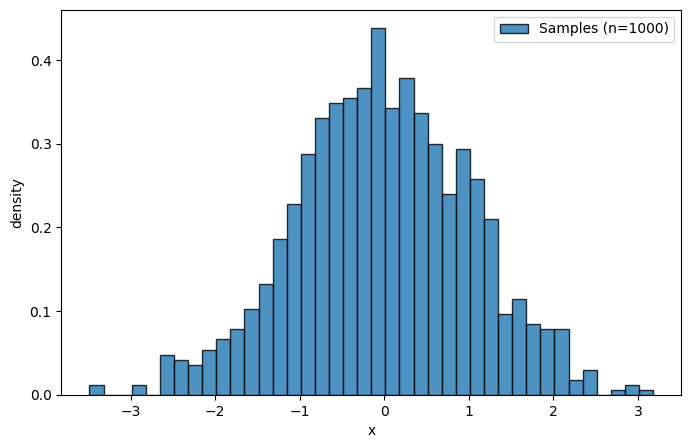


Average Uniform draws over 500 runs: 3040.9
95% CI (replication-based): [3036.0, 3045.8]


In [43]:
n = 1000
rng = np.random.default_rng(42)
xs, trials, acc = rnorm_ar_cauchy(n, rng=rng)
uniform_draws = 2 * trials
print(f"n = {n}")
print(f"Empirical acceptance ≈ {acc:.4f} (theory = {1/k_star_cauchy:.4f})")
print(f"Trials used = {trials}  -> Uniform draws = 2 * {trials} = {uniform_draws}")

xx = np.linspace(-4, 4, 800)
plt.figure(figsize=(8,5))
plt.hist(xs, bins=40, density=True, edgecolor='k', alpha=0.8, label='Samples (n=1000)')
plt.xlabel('x'); plt.ylabel('density')
plt.legend(); plt.show()

R = 500
draw_counts = np.empty(R)
for r in range(R):
    _, tr, _ = rnorm_ar_cauchy(n, rng=np.random.default_rng())
    draw_counts[r] = 2 * tr

mean_draws = draw_counts.mean()
se_draws = draw_counts.std(ddof=1) / np.sqrt(R)
ci_lo, ci_hi = mean_draws - 1.96 * se_draws, mean_draws + 1.96 * se_draws

print(f"\nAverage Uniform draws over {R} runs: {mean_draws:.1f}")
print(f"95% CI (replication-based): [{ci_lo:.1f}, {ci_hi:.1f}]")